# Description

Training a Long Short Term Memory (LSTM) network, a type of RNN to classify music genre. The time series compatibility and long range pattern detection make LSTMs an ideal choice for any type of audio processing tasks.

# Packages

In [1]:
import json
import numpy as np
from utils import load_data, split_dataset, plot_history
import tensorflow as tf

# Load data

In [2]:
DATA_PATH = 'preprocessed_raw_audio_data.json'

In [3]:
features, target = load_data(DATA_PATH)

In [4]:
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X=features, y=target, t_size=0.25, v_size=0.2)

In [5]:
features.shape

(9986, 130, 13)

# Model definition

In [8]:
model = tf.keras.Sequential()

input_shape = (features.shape[1], features.shape[2])

# lstm layers
model.add(tf.keras.layers.LSTM(units=64, input_shape=input_shape, return_sequences=True)) # sequence to sequence
model.add(tf.keras.layers.LSTM(units=64))

model.add(tf.keras.layers.Dense(units=64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(units=10, activation="softmax"))



c:\Users\acer\Desktop\Projects\Music Genre Classifier\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 130, 64)        │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,802 (225.79 KB)

 Trainable params: 57,802 (225.79 KB)

 Non-trainable params: 0 (0.00 B)

# Train

In [10]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=30)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.1588 - loss: 2.2572 - val_accuracy: 0.2657 - val_loss: 2.0423
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.2795 - loss: 2.0007 - val_accuracy: 0.3992 - val_loss: 1.7647
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.3782 - loss: 1.7602 - val_accuracy: 0.4546 - val_loss: 1.5758
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.4250 - loss: 1.6223 - val_accuracy: 0.4740 - val_loss: 1.4985
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.4495 - loss: 1.5389 - val_accuracy: 0.4873 - val_loss: 1.4349
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - accuracy: 0.4807 - loss: 1.4491 - val_accuracy: 0.4993 - val_loss: 1.4123
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.5021 - loss: 1.4182 - val_accuracy: 0.5127 - val_loss: 1.3785
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.5215 - loss: 1.3924 - 

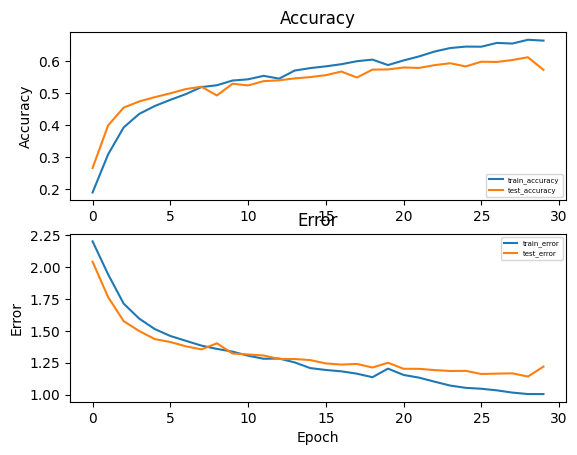

In [26]:
plot_history(history)

# Prediction

In [25]:
X = X_test[11]
X = X[np.newaxis, ...]
y = y_test[11]
y_predicted = tf.argmax(model.predict(X), axis=-1)[0]
print(f"Actual genre: {y} \n Predicted genre: {y_predicted}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Actual genre: 3 
 Predicted genre: 3
